## 2. Descriptive Analysis
For descriptive analysis, predominantly Pandas is used for data transformation, in conjunction with some useful visualization libraries, which help understanding of the obtained data.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import statsmodels.api as sm

from descriptive import parse_time_value
from scipy.stats import zscore

# Set some specs for plotting
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16.0, 8.0)
mpl.style.use('ggplot')
plt.rcParams['font.family'] = 'IPAGothic'

# Read data from the data folder
file_directory = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), '')) + '\\'
race_df = pd.read_csv(file_directory + 'data/race.csv', low_memory=False, index_col=0)
horse_df = pd.read_csv(file_directory + 'data/horse.csv', low_memory=False, index_col=0)
individual_df = pd.read_csv(file_directory + 'data/individual.csv', low_memory=False, index_col=0)
trainer_df = pd.read_csv(file_directory + 'data/trainer.csv', low_memory=False, index_col=0)
jockey_df = pd.read_csv(file_directory + 'data/jockey.csv', low_memory=False, index_col=0)

C:\Users\terry\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## 2.1 Race

### 2.1.1 Race Dataframe 

In [2]:
# Do some type transformation for certain columns
race_df['run_time'] = race_df['run_time'].apply(lambda x: parse_time_value(x))
race_df['distance'] = race_df['distance'].apply(lambda x: re.search(r'(\d+)m', x).group(1)).astype(int)

# Overview of the dataframe structure
race_df.sample(n=5).T

,207606,35372,195926,297913,618419
run_date,2004-07-17,2000-10-15,2004-02-14,2006-05-14,2012-12-08
place,小倉,東京,東京,新潟,阪神
race,4R,11R,12R,9R,6R
title,3歳未勝利,府中牝馬S(G3),4歳上1000万下,4歳上500万下,2歳新馬
type,芝,芝,ダ,芝,ダ
track,右,左,左,左,右
distance,1200,1800,1300,1400,1800
weather,晴,雨,晴,晴,晴
condition,良,良,良,良,良
time,11:40,15:30,16:15,14:10,12:55


In [3]:
# Describe the numerical variables
race_df.describe()

,distance,bracket,horse_number,jockey_weight,run_time,run_time_last_600,win_odds,win_fav,horse_id,jockey_id,trainer_id
count,857942.000000,857942.000000,857942.000000,857942.000000,857942.000000,857932.000000,857942.000000,857942.000000,8.579420e+05,857942.000000,857942.000000
mean,1628.745749,4.761040,7.854784,54.977496,101.320120,36.558981,65.719153,7.824347,2.005082e+09,1229.094017,729.306952
std,432.622300,2.268133,4.441266,1.799887,30.068917,4.678954,94.062483,4.426327,5.349266e+06,1145.828448,506.632258
min,1000.000000,1.000000,1.000000,47.000000,53.700000,12.700000,1.000000,1.000000,1.986102e+09,140.000000,101.000000
25%,1200.000000,3.000000,4.000000,54.000000,75.100000,35.600000,8.700000,4.000000,2.000109e+09,706.000000,374.000000
50%,1600.000000,5.000000,8.000000,55.000000,99.400000,37.000000,25.700000,8.000000,2.005104e+09,1031.000000,1001.000000
75%,1800.000000,7.000000,11.000000,56.000000,115.500000,38.600000,82.300000,11.000000,2.009109e+09,1102.000000,1057.000000
max,4260.000000,8.000000,18.000000,66.000000,326.400000,99.800000,999.900000,18.000000,2.015110e+09,5551.000000,5717.000000


### 2.1.2 Race Condition 

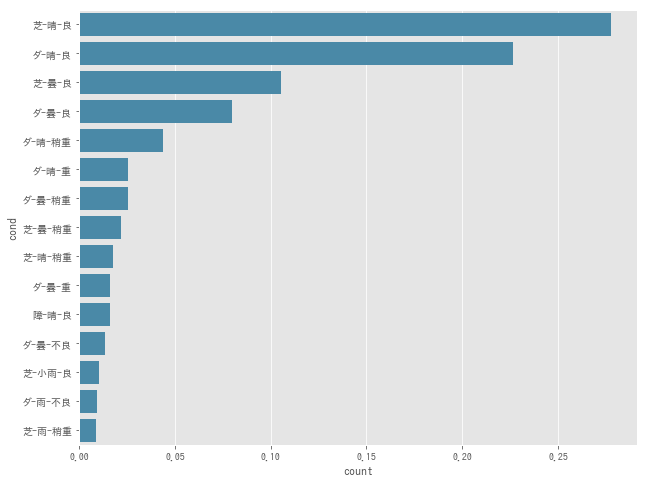

In [4]:
# Count the different race conditions
mpl.rcParams['figure.figsize'] = (10.0, 8.0)
mpl.style.use('ggplot')
race_count = race_df.groupby(['type', 'weather', 'condition']).agg({'run_date': 'count'}).reset_index()
race_count.columns = ['type', 'weather', 'condition', 'count']
race_count['count'] = race_count['count'] / race_count['count'].sum()
race_count['cond'] = race_count['type'].str.cat(race_count['weather'], sep='-').str.cat(race_count['condition'], sep='-')
race_count_sorted = race_count.sort_values('count', ascending=False)[:15]
sns.barplot(x='count', y='cond', data=race_count_sorted, color='#3A8FB7')

### 2.1.3 Time and Distance

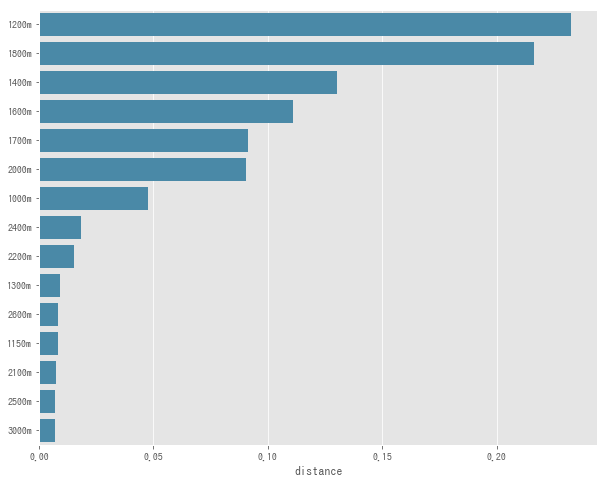

In [5]:
# Get the top run distance among the events
mpl.rcParams['figure.figsize'] = (10.0, 8.0)
mpl.style.use('ggplot')
distance_count = race_df['distance'].value_counts()[:15]
distance_count.index = list(map(lambda x: '%sm' % str(x), distance_count.index))
sns.barplot(y=distance_count.index, x=distance_count/distance_count.sum(), color='#3A8FB7')

                            OLS Regression Results                            
Dep. Variable:               run_time   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 5.135e+07
Date:                Fri, 06 Apr 2018   Prob (F-statistic):               0.00
Time:                        16:29:46   Log-Likelihood:            -2.3750e+06
No. Observations:              857942   AIC:                         4.750e+06
Df Residuals:                  857940   BIC:                         4.750e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.9500      0.016   -675.471      0.0

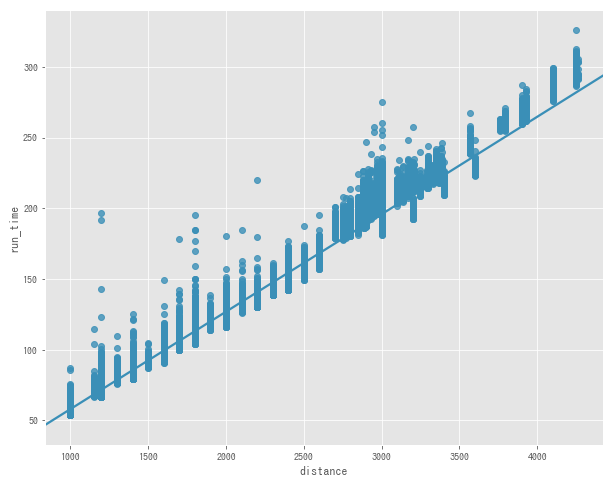

In [6]:
# Get the relationship between time and distance
dist_time = sm.OLS(race_df['run_time'], sm.add_constant(race_df['distance']))
dist_time_re = dist_time.fit()
print(dist_time_re.summary())
mpl.rcParams['figure.figsize'] = (10.0, 8.0)
mpl.style.use('ggplot')
sns.regplot(y='run_time', x='distance', data=race_df, color='#3A8FB7')

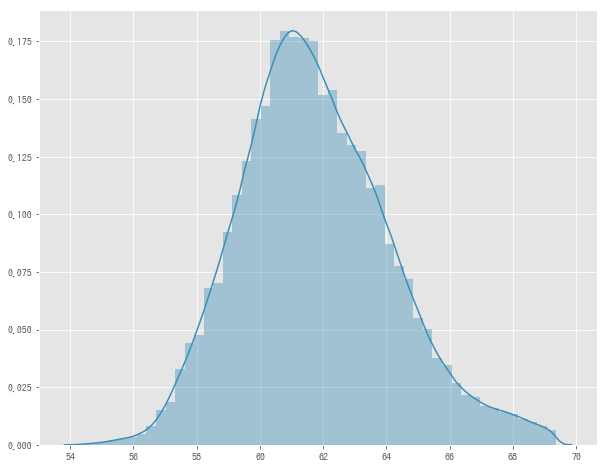

In [7]:
# Plot transformed time value
time_transformed = race_df['run_time'] / (race_df['distance'] / 1000)
sns.distplot(time_transformed[abs(zscore(time_transformed)) < 3], color='#3A8FB7')

In [8]:
time_transformed.mean()

61.83602067903135

In [9]:
time_transformed.std()

2.5128659812792193

## 2.2 Horse

### 2.2.1 Horse Dataframe 

In [10]:
# Do some type transformation for certain columns
horse_df['gender'] = horse_df['gender'].apply(lambda x: x[0])

# Overview of the dataframe structure
horse_df.sample(n=5).T

,46373,76112,27017,30744,13835
horse_id,2007103038,2013105523,2002101857,2003105462,1999101773
horse_name,スターリークルーズ,ハミングウィズミー,トゥルーカラー,エアダヴィンチ,メイショウアゲハ
date_of_birth,2007年4月1日,2013年2月24日,2002年5月15日,2003年4月2日,1999年4月22日
trainer,木原一良 (栗東),松木啓助 (高知),吉岡八郎 (栗東),三小田幸 (佐賀),鮫島一歩 (栗東)
owner,サンデーレーシング,石本鈴雄,林順子,古倉正一,松本好雄
breeder,社台コーポレーション白老ファーム,社台ファーム,協和牧場,藤原牧場,中島俊明
place_of_birth,白老町,千歳市,新冠町,静内町,浦河町
transaction_price,-,-,-,-,-
prize_obtained,485万円 (中央) /0万円 (地方),134万円 (地方),0万円,0万円 (地方),"2,526万円 (中央)"
race_record,16戦0勝 [ 0-1-0-15 ],29戦5勝 [ 5-5-5-14 ],5戦0勝 [ 0-0-0-5 ],2戦0勝 [ 0-0-0-2 ],27戦2勝 [ 2-1-5-19 ]


In [11]:
# Describe the columns of the dataframe
horse_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
horse_id,86898,NaN,NaN,NaN,2.00581e+09,5.64675e+06,1.9861e+09,2.0011e+09,2.0061e+09,2.0111e+09,2.01511e+09
horse_name,86898,85820,トリガー,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_of_birth,86898,3905,2002年4月3日,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trainer,86896,2064,(地方),542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner,86894,6510,サンデーレーシング,1304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
breeder,86876,4264,ノーザンファーム,4750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
place_of_birth,86895,106,浦河町,16137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transaction_price,86898,7779,-,68212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prize_obtained,86898,30912,0万円,14794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race_record,86898,22588,2戦0勝 [ 0-0-0-2 ],3642,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2.2 Gender and Breed 

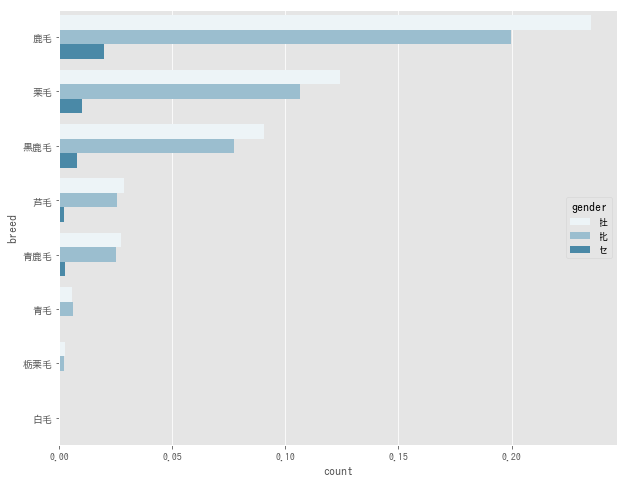

In [12]:
# Get gender and breed information
breed_gender_count = horse_df.groupby(['breed', 'gender']).agg({'horse_name': 'count'}).reset_index()
breed_gender_count.columns = ['breed', 'gender', 'count']
breed_gender_count = breed_gender_count.sort_values('count', ascending=False)
breed_gender_count['count'] = breed_gender_count['count'] / breed_gender_count['count'].sum()
sns.barplot(x='count', y='breed', data=breed_gender_count, color='#3A8FB7', hue='gender')

### 2.2.3 Horse and Run Time

In [13]:
# Merge race and horse dataframe and alter datetime type of information
horse_race = race_df.merge(horse_df, left_on='horse_id', right_on='horse_id')
horse_race['run_date'] = horse_race['run_date'].str.cat(horse_race['time'], sep=' ').apply(lambda x: pd.Timestamp(x))
horse_race['date_of_birth'] = horse_race['date_of_birth'].apply(lambda x: pd.Timestamp('-'.join(re.findall(r'\d+', x))))
horse_race['curr_age'] = horse_race['run_date'].subtract(horse_race['date_of_birth']).dt.days / 365.0

# Replace abnormal age value by the original sex/age string
# ori_age = horse_race['sex_age'].apply(lambda string: float(string[1]))
# age_diff = horse_race['curr_age'] - ori_age
# horse_race.loc[abs(age_diff) > 1, 'curr_age'] = ori_age
horse_race.sample(n=5).T

,824044,260021,363629,506826,194885
run_date,2016-10-16 10:40:00,2004-08-21 11:40:00,2012-11-10 14:45:00,2011-01-22 16:10:00,2002-11-16 11:20:00
place,新潟,小倉,福島,中山,京都
race,3R,4R,10R,12R,4R
title,2歳未勝利,3歳未勝利,三春駒特別(500万下),4歳上1000万下,2歳新馬
type,芝,ダ,芝,ダ,芝
track,直,右,右,右,右
distance,1000,1700,2000,1200,1600
weather,晴,晴,曇,晴,晴
condition,良,良,良,良,良
time,10:40,11:40,14:45,16:10,11:20


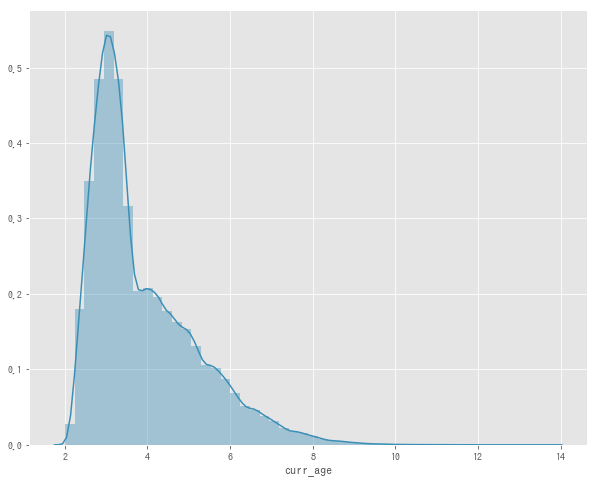

In [14]:
# Get the histogram of horse age relative to the run date and time
sns.distplot(horse_race['curr_age'], color='#3A8FB7')

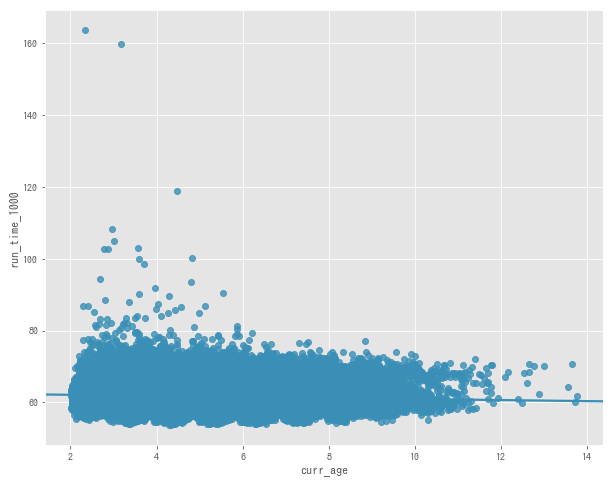

In [15]:
horse_race['run_time_1000'] = horse_race['run_time'] / (horse_race['distance'] / 1000)
sns.regplot(x='curr_age', y='run_time_1000', data=horse_race, color='#3A8FB7')

-0.19969616044865157
0.44044621485140245


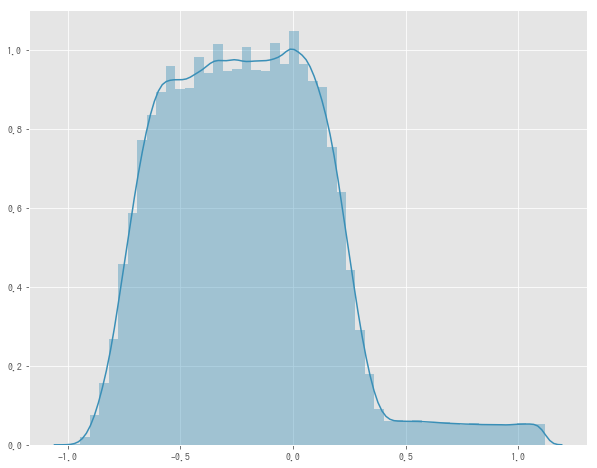

In [16]:
age_diff = horse_race['sex_age'].apply(lambda x: x[-1]).astype(float) - horse_race['curr_age']
print(age_diff.mean())
print(age_diff.std())
age_diff = age_diff[abs(zscore(age_diff)) <= 3]
sns.distplot(age_diff, color='#3A8FB7')

## 2.3 Individuals

In [17]:
# Do some type transformation for certain columns
for columns in list(individual_df.columns)[2:-1]:
    individual_df[columns] = individual_df[columns].apply(lambda x: x.replace(',', '') 
                                                          if type(x) not in [int, float] else x)

# Overview of the dataframe structure
individual_df.sample(n=5).T

,22020,79004,81347,13961,78515
individual_id,00108,226007,875005,523005,900517
individual_type,調教師,馬主,馬主,馬主,生産者
name,[西]安藤正敏,小平学,橋本孝雄,松本好雄,高橋忍
year,1986,2005,1990,2007,2006
rank,148,1175,1232,4,313
first,11,0,0,58,3
second,11,0,1,62,5
third,20,0,0,46,1
out,100,3,3,621,24
races_major,1,0,0,35,2


In [18]:
# Describe the columns of the dataframe
individual_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,103486.0,2002.737018,8.656180,1986.0,1996.0,2003.000,2010.000,2018.0
rank,103486.0,654.773129,446.273863,1.0,228.0,619.000,1055.000,1547.0
first,103421.0,3.636321,11.365576,0.0,0.0,1.000,3.000,592.0
second,103421.0,3.626807,10.436554,0.0,0.0,1.000,3.000,517.0
third,103421.0,3.622069,9.819704,0.0,0.0,1.000,3.000,437.0
races_major,103421.0,1.901142,7.533371,0.0,0.0,0.000,1.000,476.0
wins_major,103421.0,0.134064,0.803265,0.0,0.0,0.000,0.000,51.0
wins_special,103421.0,0.837586,3.088580,0.0,0.0,0.000,1.000,170.0
wins_flat,103421.0,2.664672,7.878645,0.0,0.0,1.000,2.000,385.0
wins_grass,103421.0,1.768471,6.587319,0.0,0.0,0.000,1.000,431.0


## 2.4 Jockey and Trainer Profile 

In [19]:
# Do some type transformation for certain columns
for columns in trainer_df.columns:
    trainer_df[columns] = trainer_df[columns].apply(lambda x: np.nan if x == 'null' else x)

for columns in jockey_df.columns:
    jockey_df[columns] = jockey_df[columns].apply(lambda x: np.nan if x == 'null' else x)
    if columns in ['height', 'weight']:
        jockey_df[columns] = jockey_df[columns].apply(lambda x: x if pd.isnull(x) else re.search(r'\d+', x).group(0))
        jockey_df[columns] = jockey_df[columns].astype(float)

# Overview of the dataframe structure
trainer_df.sample(n=5).T

,226,64,175,367,156
trainer_id,399,405,191,5175,424
trainer_name,[東]国枝栄,[東]小西一男,[西]鹿戸幸治,[地]室井康雄,[東]蛯名信広
date_of_birth,1955/04/14,1955/09/30,1937/06/18,1947/09/24,1952/10/30
place_of_birth,岐阜県,千葉県,北海道,地方,千葉県
first_run_date,1990/02/04,1991/03/02,1978/03/11,NaN,1994/03/05
first_run_horse,シャインハード,ミニヨン,ホッカイコハク,NaN,アーバンエース
first_win_date,1990/03/10,1991/06/23,1978/07/08,NaN,1994/03/13
first_win_horse,リュウカムイ,サロマブルー,ラクサイオー,NaN,デンマークシチー


In [20]:
# Overview of the dataframe structure
jockey_df.sample(n=5).T

,714,523,41,666,589
jockey_id,1143,1091,716,1131,5400
jockey_name,原田和真,丹内祐次,吉永護,西村太一,テリアン
date_of_birth,1994/01/15,1985/11/05,1973/11/16,1990/03/21,1975/07/30
place_of_birth,大阪府,北海道,茨城県,大阪府,地方
blood_type,AB型,O型,A型,A型,NaN
height,164,163,168,163,NaN
weight,47,47,50,47,NaN
first_flat_run_date,2012/03/03,2004/03/06,1992/03/01,2010/03/06,NaN
first_flat_run_horse,アテンボーイ,ディヴァインリー,メローマインド,ユキノマドンナ,NaN
first_flat_win_date,2012/03/10,2004/04/10,1992/03/21,2010/06/20,NaN


In [21]:
# Describe the columns of the dataframe
trainer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
trainer_id,1021.0,3580.235064,2302.371476,101.0,1020.0,5181.0,5460.0,5717.0


In [22]:
# Describe the columns of the dataframe
jockey_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
jockey_id,807,NaN,NaN,NaN,3321.83,2224.18,140,1010.5,5089,5346.5,5551
jockey_name,807,801,ウィリア,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_of_birth,807,780,1990/12/27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
place_of_birth,807,41,地方,573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blood_type,229,4,A型,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,236,NaN,NaN,NaN,161.614,4.25562,149,159,162,164,174
weight,236,NaN,NaN,NaN,48.4619,3.01532,43,46,47,51,59
first_flat_run_date,735,424,1996/03/02,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_flat_run_horse,735,727,タマルファイター,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_flat_win_date,453,405,2002/04/21,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
race_df.to_csv('data/race.csv', encoding='utf-8')
horse_df.to_csv('data/horse.csv', encoding='utf-8')
individual_df.to_csv('data/individual.csv', encoding='utf-8')
trainer_df.to_csv('data/trainer.csv', encoding='utf-8')
jockey_df.to_csv('data/jockey.csv', encoding='utf-8')
horse_race.to_csv('data/horse_race.csv', encoding='utf-8')

FileNotFoundError: [Errno 2] No such file or directory: 'data/race.csv'